<a href="https://colab.research.google.com/github/bamSirikorn/dataviz2025/blob/main/Final_Project_group1_%E0%B9%80%E0%B8%AD%E0%B8%B2%E0%B9%84%E0%B8%9B%E0%B8%AB%E0%B8%99%E0%B8%B6%E0%B9%88%E0%B8%87%E0%B9%81%E0%B8%95%E0%B9%89%E0%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Looker

[Link Looker ](https://lookerstudio.google.com/reporting/22fa40d6-435f-45d1-9476-f9d296beae9d)

#ข้อมูล

In [169]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [170]:
import pandas as pd
import os

##stop-and-search

In [171]:
base_path = '/content/drive/MyDrive/Python&DataViz2025/Data'
months_to_load = ['2025-01', '2025-02', '2025-03', '2025-04', '2025-05']
cities_to_load = {
    'cumbria', 'gloucestershire', 'kent', 'metropolitan', 'norfolk',
    'northamptonshire', 'nottinghamshire', 'south-yorkshire', 'suffolk',
    'surrey', 'warwickshire', 'west-mercia', 'west-yorkshire'
}

# Dictionary สำหรับเก็บ DataFrame ทั้งหมด
all_stop_search_data = {}

print(f"🚀 เริ่มโหลดข้อมูลจาก: {months_to_load}")
print(f"🎯 โหลดเฉพาะเมือง: {', '.join(sorted(list(cities_to_load)))}\n")

# วนลูปตามเดือนที่กำหนด
for month in months_to_load:
    path = os.path.join(base_path, month)

    if not os.path.isdir(path):
        print(f"⚠️ ไม่พบโฟลเดอร์สำหรับเดือน: {month}")
        continue

    print(f"📂 กำลังอ่านข้อมูลเดือน: {month}")

    # วนลูปอ่านไฟล์ในโฟลเดอร์
    for file in os.listdir(path):
        if 'stop-and-search' in file and file.endswith('.csv'):

            # ดึงชื่อเมืองออกจากชื่อไฟล์
            city_name = file.replace(f'{month}-', '').replace('-stop-and-search.csv', '')

            if city_name in cities_to_load:
                file_path = os.path.join(path, file)
                city_name_key = f"{month}-{city_name}"

                try:
                    df = pd.read_csv(file_path)
                    all_stop_search_data[city_name_key] = df
                except Exception as e:
                    print(f"   ❌ เกิดข้อผิดพลาดในการอ่านไฟล์ {file}: {e}")

print(f"\n✅ โหลดข้อมูลเสร็จแล้วทั้งหมด {len(all_stop_search_data)} ไฟล์ (จากเมืองที่เลือก)")
print("\n--- สรุปข้อมูลที่โหลดมา (จัดกลุ่มตามเดือน) ---")

for month in months_to_load:
    keys_for_month = sorted([key for key in all_stop_search_data if key.startswith(month)])

    print(f"\n--- เดือน {month} (พบ {len(keys_for_month)} เมือง) ---")

    if not keys_for_month:
        print("   (ไม่พบข้อมูลในเดือนนี้)")
        continue

    for key in keys_for_month:
        num_rows = len(all_stop_search_data[key])
        print(f"   {key}: {num_rows} แถว")

🚀 เริ่มโหลดข้อมูลจาก: ['2025-01', '2025-02', '2025-03', '2025-04', '2025-05']
🎯 โหลดเฉพาะเมือง: cumbria, gloucestershire, kent, metropolitan, norfolk, northamptonshire, nottinghamshire, south-yorkshire, suffolk, surrey, warwickshire, west-mercia, west-yorkshire

📂 กำลังอ่านข้อมูลเดือน: 2025-01
📂 กำลังอ่านข้อมูลเดือน: 2025-02
📂 กำลังอ่านข้อมูลเดือน: 2025-03
📂 กำลังอ่านข้อมูลเดือน: 2025-04
📂 กำลังอ่านข้อมูลเดือน: 2025-05

✅ โหลดข้อมูลเสร็จแล้วทั้งหมด 64 ไฟล์ (จากเมืองที่เลือก)

--- สรุปข้อมูลที่โหลดมา (จัดกลุ่มตามเดือน) ---

--- เดือน 2025-01 (พบ 13 เมือง) ---
   2025-01-cumbria: 785 แถว
   2025-01-gloucestershire: 140 แถว
   2025-01-kent: 1305 แถว
   2025-01-metropolitan: 3646 แถว
   2025-01-norfolk: 159 แถว
   2025-01-northamptonshire: 578 แถว
   2025-01-nottinghamshire: 328 แถว
   2025-01-south-yorkshire: 1183 แถว
   2025-01-suffolk: 195 แถว
   2025-01-surrey: 379 แถว
   2025-01-warwickshire: 94 แถว
   2025-01-west-mercia: 288 แถว
   2025-01-west-yorkshire: 1350 แถว

--- เดือน 2025-02

In [172]:
# รวมข้อมูลเป็นตารางเดียว
city_order = [
    'cumbria', 'gloucestershire', 'kent', 'metropolitan', 'norfolk',
    'northamptonshire', 'nottinghamshire', 'south-yorkshire', 'suffolk',
    'surrey', 'warwickshire', 'west-mercia', 'west-yorkshire'
]

all_cities_combined_df = pd.DataFrame()

for city_month, df in all_stop_search_data.items():
    parts = city_month.split('-')
    year = parts[0]
    month = parts[1]
    city_name = '-'.join(parts[2:])
    df_copy = df.copy()
    df_copy['City'] = city_name
    df_copy['_MonthOrder'] = int(month)

    all_cities_combined_df = pd.concat([all_cities_combined_df, df_copy], ignore_index=True)

all_cities_combined_df['City'] = pd.Categorical(
    all_cities_combined_df['City'], categories=city_order, ordered=True
)
all_cities_combined_df = all_cities_combined_df.sort_values(by=['City', '_MonthOrder']).reset_index(drop=True)

all_cities_combined_df = all_cities_combined_df.drop(columns=['_MonthOrder'])

cols = ['City'] + [col for col in all_cities_combined_df.columns if col != 'City']
all_cities_combined_df = all_cities_combined_df[cols]

print(f"✅ รวมข้อมูลทุกเมืองทุกเดือนเสร็จสิ้น ได้ข้อมูลรวมทั้งหมด {all_cities_combined_df.shape[0]} แถว")
display(all_cities_combined_df.head())


✅ รวมข้อมูลทุกเมืองทุกเดือนเสร็จสิ้น ได้ข้อมูลรวมทั้งหมด 47815 แถว


,City,Type,Date,Part of a policing operation,Policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing
0,cumbria,Person search,2025-01-01T00:00:00+00:00,False,NaN,54.163238,-3.071678,Female,over 34,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,False,NaN
1,cumbria,Person search,2025-01-01T00:02:00+00:00,False,NaN,54.642297,-3.542447,Male,10-17,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,False,NaN
2,cumbria,Person search,2025-01-01T00:08:00+00:00,False,NaN,54.642297,-3.542447,Male,18-24,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Summons / charged by post,True,NaN
3,cumbria,Person search,2025-01-01T00:30:00+00:00,False,NaN,54.642297,-3.542447,Male,18-24,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,False,NaN
4,cumbria,Person search,2025-01-01T00:50:00+00:00,False,NaN,54.642252,-3.544584,Male,18-24,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,False,NaN


##Outcome & street

In [173]:
# โฟลเดอร์หลัก
base_path = '/content/drive/MyDrive/Python&DataViz2025/Data/'

# คำหลักที่ต้องการค้นหา
keywords = ['cumbria', 'gloucestershire', 'kent', 'metropolitan','nottinghamshire',
            'south-yorkshire','suffolk','surrey','norfolk','northamptonshire',
            'warwickshire','west-mercia','west-yorkshire']

# เก็บ DataFrame ทั้งหมด
all_dfs = []

import glob
# วนลูปทุกโฟลเดอร์ย่อย (รายเดือน เช่น 2025-01, 2025-02, ...)
for folder in glob.glob(os.path.join(base_path, '2025-*')):
    # ดึงไฟล์ทั้งหมดในโฟลเดอร์นั้น
    for file in glob.glob(os.path.join(folder, '*.csv')):
        filename = os.path.basename(file).lower()

        # ตรวจสอบ: ต้องมี keyword และลงท้ายด้วย 'outcomes.csv'
        if any(k in filename for k in keywords) and filename.endswith('street.csv'):
            print(f"📄 Reading: {file}")
            df = pd.read_csv(file)

            # 🔹 หาชื่อเมืองจาก keyword ที่อยู่ในชื่อไฟล์
            Police_Force_name = next((k for k in keywords if k in filename), 'unknown')

            # 🔹 เพิ่มคอลัมน์ 'Police Force' ที่เก็บชื่อเมือง
            df['Police Force'] = Police_Force_name.capitalize().replace('-', ' ')

            # เพิ่ม DataFrame เข้า list
            all_dfs.append(df)

# รวมทั้งหมดเป็น DataFrame เดียว
street_df = pd.concat(all_dfs, ignore_index=True)
display(street_df.head())

📄 Reading: /content/drive/MyDrive/Python&DataViz2025/Data/2025-01/2025-01-west-mercia-street.csv
📄 Reading: /content/drive/MyDrive/Python&DataViz2025/Data/2025-01/2025-01-suffolk-street.csv
📄 Reading: /content/drive/MyDrive/Python&DataViz2025/Data/2025-01/2025-01-kent-street.csv
📄 Reading: /content/drive/MyDrive/Python&DataViz2025/Data/2025-01/2025-01-nottinghamshire-street.csv
📄 Reading: /content/drive/MyDrive/Python&DataViz2025/Data/2025-01/2025-01-metropolitan-street.csv
📄 Reading: /content/drive/MyDrive/Python&DataViz2025/Data/2025-01/2025-01-norfolk-street.csv
📄 Reading: /content/drive/MyDrive/Python&DataViz2025/Data/2025-01/2025-01-northamptonshire-street.csv
📄 Reading: /content/drive/MyDrive/Python&DataViz2025/Data/2025-01/2025-01-gloucestershire-street.csv
📄 Reading: /content/drive/MyDrive/Python&DataViz2025/Data/2025-01/2025-01-south-yorkshire-street.csv
📄 Reading: /content/drive/MyDrive/Python&DataViz2025/Data/2025-01/2025-01-warwickshire-street.csv
📄 Reading: /content/drive/

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context,Police Force
0,6085ced56f9fd556985c10bdf35fa17483c7366b44929a...,2025-01,West Mercia Police,West Mercia Police,-2.015357,52.395158,On or near Beoley Grove,E01009160,Birmingham 125E,Violence and sexual offences,Unable to prosecute suspect,NaN,West mercia
1,e8b0e13de01f47673ff2f917f2881d696425788ba1de05...,2025-01,West Mercia Police,West Mercia Police,-2.027574,52.403067,On or near Mull Close,E01009161,Birmingham 125F,Public order,Under investigation,NaN,West mercia
2,NaN,2025-01,West Mercia Police,West Mercia Police,-1.988848,52.385872,On or near Flight Shed Way,E01034945,Birmingham 129F,Anti-social behaviour,NaN,NaN,West mercia
3,NaN,2025-01,West Mercia Police,West Mercia Police,-3.249003,51.779295,On or near Deighton Close,W01001480,Blaenau Gwent 003E,Anti-social behaviour,NaN,NaN,West mercia
4,NaN,2025-01,West Mercia Police,West Mercia Police,-2.136931,52.417177,On or near Durrant Mews,E01032138,Bromsgrove 001A,Anti-social behaviour,NaN,NaN,West mercia


In [174]:
# เก็บ DataFrame ทั้งหมด
all_dfs = []

# วนลูปทุกโฟลเดอร์ย่อย (รายเดือน เช่น 2025-01, 2025-02, ...)
for folder in glob.glob(os.path.join(base_path, '2025-*')):
    # ดึงไฟล์ทั้งหมดในโฟลเดอร์นั้น
    for file in glob.glob(os.path.join(folder, '*.csv')):
        filename = os.path.basename(file).lower()

        # ตรวจสอบ: ต้องมี keyword และลงท้ายด้วย 'outcomes.csv'
        if any(k in filename for k in keywords) and filename.endswith('outcomes.csv'):
            print(f"📄 Reading: {file}")
            df = pd.read_csv(file)

            # 🔹 หาชื่อเมืองจาก keyword ที่อยู่ในชื่อไฟล์
            Police_Force_name = next((k for k in keywords if k in filename), 'unknown')

            # 🔹 เพิ่มคอลัมน์ 'Police Force' ที่เก็บชื่อเมือง
            df['Police Force'] = Police_Force_name.capitalize().replace('-', ' ')

            # เพิ่ม DataFrame เข้า list
            all_dfs.append(df)

# รวมทั้งหมดเป็น DataFrame เดียว
outcome_df = pd.concat(all_dfs, ignore_index=True)
display(outcome_df.head())

📄 Reading: /content/drive/MyDrive/Python&DataViz2025/Data/2025-01/2025-01-west-mercia-outcomes.csv
📄 Reading: /content/drive/MyDrive/Python&DataViz2025/Data/2025-01/2025-01-west-yorkshire-outcomes.csv
📄 Reading: /content/drive/MyDrive/Python&DataViz2025/Data/2025-01/2025-01-south-yorkshire-outcomes.csv
📄 Reading: /content/drive/MyDrive/Python&DataViz2025/Data/2025-01/2025-01-warwickshire-outcomes.csv
📄 Reading: /content/drive/MyDrive/Python&DataViz2025/Data/2025-01/2025-01-surrey-outcomes.csv
📄 Reading: /content/drive/MyDrive/Python&DataViz2025/Data/2025-01/2025-01-northamptonshire-outcomes.csv
📄 Reading: /content/drive/MyDrive/Python&DataViz2025/Data/2025-01/2025-01-metropolitan-outcomes.csv
📄 Reading: /content/drive/MyDrive/Python&DataViz2025/Data/2025-01/2025-01-cumbria-outcomes.csv
📄 Reading: /content/drive/MyDrive/Python&DataViz2025/Data/2025-01/2025-01-suffolk-outcomes.csv
📄 Reading: /content/drive/MyDrive/Python&DataViz2025/Data/2025-01/2025-01-kent-outcomes.csv
📄 Reading: /cont

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Outcome type,Police Force
0,624bd4520292806beb817d0b745f59049b33c4d2b1df76...,2025-01,West Mercia Police,West Mercia Police,NaN,NaN,No location,NaN,NaN,Suspect charged,West mercia
1,3789aa7d822882a0618ed07e9d9dda95e0e92792e56f52...,2025-01,West Mercia Police,West Mercia Police,-2.709097,52.058215,On or near Parking Area,E01014010,Herefordshire 012C,Local resolution,West mercia
2,1a9c6cf266ada9e9942d07cfe8b2fb451fa1d98bff7a41...,2025-01,West Mercia Police,West Mercia Police,-2.711569,52.058650,On or near Monkmoor Street,E01014010,Herefordshire 012C,Suspect charged,West mercia
3,60a15adb0b5e279f284913472c77ed48e9527ad4787562...,2025-01,West Mercia Police,West Mercia Police,-2.439833,52.729807,On or near Donnington Way,E01014128,Telford and Wrekin 005D,Unable to prosecute suspect,West mercia
4,deb984e608d13553c5a08fe924aef7bf4daba1c3d4da61...,2025-01,West Mercia Police,West Mercia Police,-2.114691,52.028566,On or near Grangefield Road,E01032348,Wychavon 019B,Suspect charged,West mercia


# จัดการ missing

In [175]:
all_cities_combined_df.drop(columns=['Policing operation'], inplace=True)
all_cities_combined_df.dropna(subset=['Part of a policing operation'], inplace=True)
all_cities_combined_df['Latitude'].fillna(0, inplace=True)
all_cities_combined_df['Longitude'].fillna(0, inplace=True)
for col in all_cities_combined_df.columns:
    if all_cities_combined_df[col].dtype == 'object':
        all_cities_combined_df[col].fillna('Unknown', inplace=True)
display(all_cities_combined_df.head())

,City,Type,Date,Part of a policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing
0,cumbria,Person search,2025-01-01T00:00:00+00:00,False,54.163238,-3.071678,Female,over 34,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,False,Unknown
1,cumbria,Person search,2025-01-01T00:02:00+00:00,False,54.642297,-3.542447,Male,10-17,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,False,Unknown
2,cumbria,Person search,2025-01-01T00:08:00+00:00,False,54.642297,-3.542447,Male,18-24,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Summons / charged by post,True,Unknown
3,cumbria,Person search,2025-01-01T00:30:00+00:00,False,54.642297,-3.542447,Male,18-24,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,False,Unknown
4,cumbria,Person search,2025-01-01T00:50:00+00:00,False,54.642252,-3.544584,Male,18-24,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,False,Unknown


In [176]:
all_cities_combined_df['Year-Month'] = pd.to_datetime(all_cities_combined_df['Date']).dt.strftime('%Y-%m')
all_cities_combined_df['location'] = all_cities_combined_df['Latitude'].astype(str) + ',' + all_cities_combined_df['Longitude'].astype(str)
display(all_cities_combined_df.head())

,City,Type,Date,Part of a policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing,Year-Month,location
0,cumbria,Person search,2025-01-01T00:00:00+00:00,False,54.163238,-3.071678,Female,over 34,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,False,Unknown,2025-01,"54.163238,-3.071678"
1,cumbria,Person search,2025-01-01T00:02:00+00:00,False,54.642297,-3.542447,Male,10-17,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,False,Unknown,2025-01,"54.642297,-3.542447"
2,cumbria,Person search,2025-01-01T00:08:00+00:00,False,54.642297,-3.542447,Male,18-24,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Summons / charged by post,True,Unknown,2025-01,"54.642297,-3.542447"
3,cumbria,Person search,2025-01-01T00:30:00+00:00,False,54.642297,-3.542447,Male,18-24,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,False,Unknown,2025-01,"54.642297,-3.542447"
4,cumbria,Person search,2025-01-01T00:50:00+00:00,False,54.642252,-3.544584,Male,18-24,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,False,Unknown,2025-01,"54.642252,-3.544584"


In [177]:
all_cities_combined_df.shape

(47812, 17)

In [178]:
# Calculate the number of remaining rows after dropping rows outside the boundaries
remaining_count = len(england_df)
print(f"จำนวนข้อมูลที่เหลือ (ในอังกฤษ): {remaining_count} แถว")

display(england_df[['Latitude', 'Longitude', 'location']].head())

จำนวนข้อมูลที่เหลือ (ในอังกฤษ): 41398 แถว


,Latitude,Longitude,location
0,54.163238,-3.071678,"54.163238,-3.071678"
1,54.642297,-3.542447,"54.642297,-3.542447"
2,54.642297,-3.542447,"54.642297,-3.542447"
3,54.642297,-3.542447,"54.642297,-3.542447"
4,54.642252,-3.544584,"54.642252,-3.544584"


In [179]:
all_cities_combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47812 entries, 0 to 47814
Data columns (total 17 columns):
 #   Column                                    Non-Null Count  Dtype   
---  ------                                    --------------  -----   
 0   City                                      47812 non-null  category
 1   Type                                      47812 non-null  object  
 2   Date                                      47812 non-null  object  
 3   Part of a policing operation              47812 non-null  object  
 4   Latitude                                  47812 non-null  float64 
 5   Longitude                                 47812 non-null  float64 
 6   Gender                                    47812 non-null  object  
 7   Age range                                 47812 non-null  object  
 8   Self-defined ethnicity                    47812 non-null  object  
 9   Officer-defined ethnicity                 47812 non-null  object  
 10  Legislation                

In [180]:
all_cities_combined_df

,City,Type,Date,Part of a policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing,Year-Month,location
0,cumbria,Person search,2025-01-01T00:00:00+00:00,False,54.163238,-3.071678,Female,over 34,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,False,Unknown,2025-01,"54.163238,-3.071678"
1,cumbria,Person search,2025-01-01T00:02:00+00:00,False,54.642297,-3.542447,Male,10-17,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,False,Unknown,2025-01,"54.642297,-3.542447"
2,cumbria,Person search,2025-01-01T00:08:00+00:00,False,54.642297,-3.542447,Male,18-24,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Summons / charged by post,True,Unknown,2025-01,"54.642297,-3.542447"
3,cumbria,Person search,2025-01-01T00:30:00+00:00,False,54.642297,-3.542447,Male,18-24,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,False,Unknown,2025-01,"54.642297,-3.542447"
4,cumbria,Person search,2025-01-01T00:50:00+00:00,False,54.642252,-3.544584,Male,18-24,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,False,Unknown,2025-01,"54.642252,-3.544584"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47810,west-yorkshire,Person search,2025-05-31T20:40:00+00:00,False,53.723700,-1.349975,Male,10-17,Other ethnic group - Not stated,Black,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,A no further action disposal,True,False,2025-05,"53.7237,-1.349975"
47811,west-yorkshire,Person search,2025-05-31T21:45:00+00:00,False,53.792204,-1.752853,Male,18-24,Unknown,Asian,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Summons / charged by post,False,False,2025-05,"53.792204,-1.752853"
47812,west-yorkshire,Person and Vehicle search,2025-05-31T21:50:00+00:00,False,53.594755,-1.317975,Male,over 34,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Arrest,True,True,2025-05,"53.594755,-1.317975"
47813,west-yorkshire,Person search,2025-05-31T22:00:00+00:00,False,53.801903,-1.581361,Male,over 34,Unknown,Asian,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Community resolution,True,False,2025-05,"53.801903,-1.581361"


# google sheet

In [181]:
# ติดตั้งไลบรารี gspread และ google-auth
#!pip install gspread google-auth

In [182]:
from google.colab import auth
from google.auth import default
import gspread

# Authenticate to Google Drive
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

In [183]:
spreadsheet_name = 'Stop_and_Search_Combined_Data'
worksheet_name = 'Sheet1'

try:
    sh = gc.open(spreadsheet_name)
    print(f"✅ เปิด Google Sheet '{spreadsheet_name}' เรียบร้อยแล้ว")
except gspread.SpreadsheetNotFound:
    print(f"⚠️ ไม่พบ Google Sheet '{spreadsheet_name}', กำลังสร้างใหม่...")
    sh = gc.create(spreadsheet_name)
    print(f"✅ สร้าง Google Sheet '{spreadsheet_name}' เรียบร้อยแล้ว")

try:
    worksheet = sh.worksheet(worksheet_name)
    print(f"✅ เลือก worksheet '{worksheet_name}' เรียบร้อยแล้ว")
except gspread.WorksheetNotFound:
    print(f"⚠️ ไม่พบ worksheet '{worksheet_name}', กำลังสร้างใหม่...")
    worksheet = sh.add_worksheet(title=worksheet_name, rows="100", cols="20") # กำหนดขนาดเริ่มต้น
    print(f"✅ สร้าง worksheet '{worksheet_name}' เรียบร้อยแล้ว")

worksheet.clear()

# Drop the 'Policing operation' column as it seems to contain problematic float values (NaNs)
# data_to_upload_df = all_cities_combined_df.drop(columns=['Policing operation'])

data_to_upload = [data_to_upload_df.columns.tolist()] + data_to_upload_df.values.tolist()

print(f"🚀 กำลังอัปโหลดข้อมูล {len(data_to_upload_df)} แถว ไปยัง worksheet '{worksheet_name}' ใน Google Sheet '{spreadsheet_name}'...")
worksheet.update(range_name='A1', values=data_to_upload)

print("✅ อัปโหลดข้อมูลเสร็จสิ้น!")
print(f"🔗 ตรวจสอบ Google Sheet ได้ที่: {sh.url}")

✅ เปิด Google Sheet 'Stop_and_Search_Combined_Data' เรียบร้อยแล้ว
✅ เลือก worksheet 'Sheet1' เรียบร้อยแล้ว
🚀 กำลังอัปโหลดข้อมูล 47812 แถว ไปยัง worksheet 'Sheet1' ใน Google Sheet 'Stop_and_Search_Combined_Data'...
✅ อัปโหลดข้อมูลเสร็จสิ้น!
🔗 ตรวจสอบ Google Sheet ได้ที่: https://docs.google.com/spreadsheets/d/1Xb58uQ8bb_9LZ73IZsT7QSv0qtuWzFODoaA9TuE37Kw


# Graph

In [184]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

**Type (ประเภท)**: ระบุประเภทของการตรวจค้น ซึ่งมีทั้ง "Person search" (การตรวจค้นบุคคล) และ "Person and Vehicle search" (การตรวจค้นบุคคลและยานพาหนะ)

**Date (วันที่)**: วันที่และเวลาที่เกิดเหตุการณ์ตรวจค้น

**Part of a policing operation (เป็นส่วนหนึ่งของปฏิบัติการตำรวจ)** : เป็นค่า "จริง" (TRUE) หรือ "เท็จ" (FALSE) เพื่อบอกว่าการตรวจค้นครั้งนั้นเป็นส่วนหนึ่งของแผนปฏิบัติการที่ใหญ่กว่าหรือไม่

**Policing operation (ปฏิบัติการตำรวจ)**: คอลัมน์นี้จะระบุชื่อแผนปฏิบัติการ

**Gender (เพศ)** : เพศของผู้ที่ถูกตรวจค้น

**Age range (ช่วงอายุ)**: กลุ่มอายุของผู้ที่ถูกตรวจค้น เช่น 18-24 ปี, มากกว่า 34 ปี

**Self-defined ethnicity (เชื้อชาติที่ระบุด้วยตนเอง)**: เป็นข้อมูลเชื้อชาติที่บุคคลที่ถูกตรวจค้นเป็นผู้ให้ข้อมูลเอง ซึ่งจะมีความละเอียดสูง เช่น "White - English/Welsh/Scottish/Northern Irish/British"

**Officer-defined ethnicity (เชื้อชาติที่เจ้าหน้าที่ระบุ)**: เป็นข้อมูลเชื้อชาติที่เจ้าหน้าที่เป็นผู้ประเมินและบันทึก ซึ่งมักจะเป็นการจัดกลุ่มแบบกว้างๆ เช่น White (คนขาว), Black (คนดำ), Asian (คนเอเชีย)

 **Location** ตำแหน่งที่อยู่ในอังกฤษ

In [185]:
city_policing_operation_counts = all_cities_combined_df.groupby('City')['Outcome'].value_counts()
display(city_policing_operation_counts)

City            Outcome                        
cumbria         A no further action disposal       2717
                Arrest                              541
                Unknown                             423
                Community resolution                186
                Summons / charged by post            44
                                                   ... 
west-yorkshire  Summons / charged by post           227
                Unknown                             107
                Caution (simple or conditional)      40
                Khat or Cannabis warning              0
                Penalty Notice for Disorder           0
Name: count, Length: 104, dtype: int64

In [186]:
# แปลง Series city_policing_operation_counts ให้อยู่ในรูป DataFrame เพื่อนำไปสร้างกราฟได้ง่ายขึ้น
df_outcome_counts = city_policing_operation_counts.reset_index(name='Count')

# คำนวณสัดส่วน (เปอร์เซ็นต์) ของแต่ละ Outcome ในแต่ละ City
df_outcome_counts['Percentage'] = df_outcome_counts.groupby('City')['Count'].transform(lambda x: x / x.sum() * 100)

# สร้างกราฟแท่งแสดงสัดส่วน Outcome ในแต่ละเมือง
fig = px.bar(
    df_outcome_counts,
    x='City',
    y='Percentage',
    color='Outcome',
    title='สัดส่วนผลลัพธ์ (Outcome) ของการ Stop and Search ในแต่ละเมือง (Normalized)',
    labels={'Percentage': 'สัดส่วน (%)', 'City': 'เมือง', 'Outcome': 'ผลลัพธ์'},
    barmode='stack' # จัดเรียงแท่งบาร์แบบซ้อนกัน
)

fig.update_layout(
    xaxis_tickangle=-45,
    yaxis_title='สัดส่วน (%)',
    legend_title='ประเภทผลลัพธ์',
    height=600,
    width=900
)

fig.show()

In [187]:
#!pip install plotly_express

##การกระจายตัวของการตรวจค้น (Stop and Search) ตามปฏิบัติการของตำรวจในแต่ละเมือง"

In [188]:
!pip install plotly_express

In [189]:
import plotly_express as px
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
# เตรียมข้อมูลสำหรับ Treemap: จัดกลุ่มตามเมืองและ Part of a policing operation และนับจำนวน
treemap_data = all_cities_combined_df.groupby(['City', 'Part of a policing operation']).size().reset_index(name='Count')

# สร้าง Treemap
fig = px.treemap(
    treemap_data,
    path=[px.Constant("All Cities"), 'City', 'Part of a policing operation'],
    values='Count',
    title='Distribution of Stop and Search by Policing Operation within Each City'
)

fig.show()

ตำรวจนครบาล (metropolitan) มีจำนวนการตรวจค้นสูงที่สุด

   ในทุกพื้นที่ที่แสดงบนกราฟ การตรวจค้นส่วนใหญ่ (เกือบทั้งหมด) ไม่ได้เป็นส่วนหนึ่งของแผนปฏิบัติการที่กำหนดไว้ล่วงหน้า (False) ซึ่งบ่งชี้ว่าการตรวจค้นมักเกิดขึ้นจากเหตุการณ์ปกติในชีวิตประจำวันมากกว่าการบุกจู่โจมตามแผน

ดังนั้น กราฟนี้ช่วยให้เห็นภาพรวมอย่างรวดเร็วว่าเมืองไหนมีการตรวจค้นมากที่สุด และลักษณะของการตรวจค้นส่วนใหญ่ในแต่ละเมืองเป็นอย่างไร

##กราฟนี้คือ กราฟแท่งแบบซ้อน (Stacked Bar Chart) ที่แสดงข้อมูล "จำนวนการตรวจค้นในแต่ละเดือน โดยจำแนกตามผลลัพธ์ว่าเกี่ยวข้องกับเหตุผลที่ตรวจค้นหรือไม่

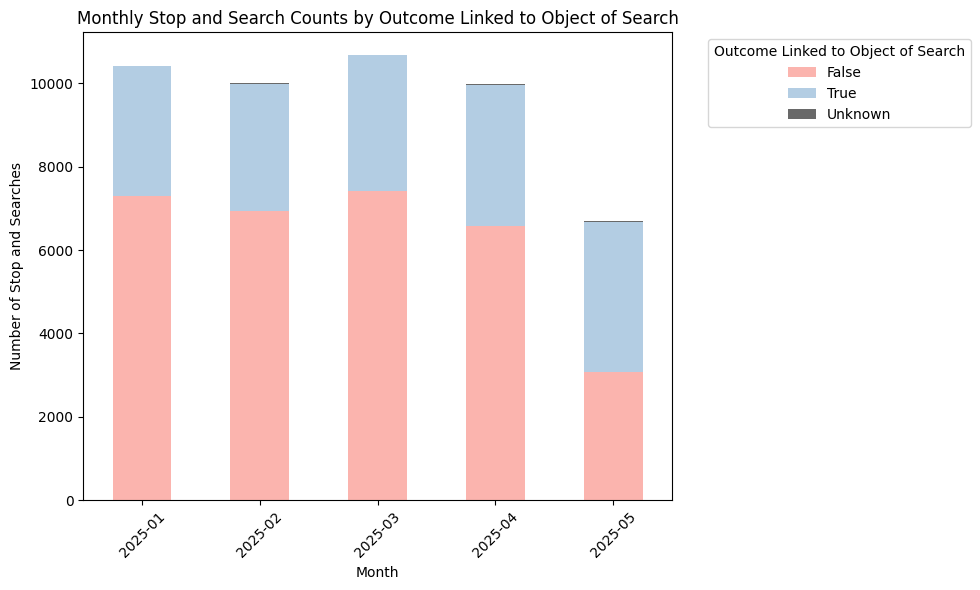

In [190]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors


monthly_outcome_linked_counts = all_cities_combined_df.groupby('Year-Month')['Outcome linked to object of search'].value_counts().unstack(fill_value=0)
monthly_outcome_linked_counts = monthly_outcome_linked_counts.sort_index()
pastel1_colors = plt.cm.Pastel1(range(monthly_outcome_linked_counts.shape[1]))

colors = list(pastel1_colors)

try:
    unknown_idx = monthly_outcome_linked_counts.columns.get_loc('Unknown')
    dark_grey = mcolors.to_rgba('dimgray')
    colors[unknown_idx] = dark_grey
except KeyError:
    pass

custom_cmap = mcolors.ListedColormap(colors)

monthly_outcome_linked_counts.plot(kind='bar', stacked=True, figsize=(10, 6), colormap=custom_cmap)

plt.title('Monthly Stop and Search Counts by Outcome Linked to Object of Search')
plt.xlabel('Month')
plt.ylabel('Number of Stop and Searches')
plt.xticks(rotation=45)
plt.legend(title='Outcome Linked to Object of Search', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

กราฟนี้ชี้ให้เห็นว่า ในช่วง 5 เดือนแรกของปี 2025 การตรวจค้นของเจ้าหน้าที่ส่วนใหญ่ไม่ประสบความสำเร็จในการค้นหาสิ่งผิดกฎหมายตามวัตถุประสงค์ที่ตั้งไว้ และมีแนวโน้มที่จำนวนการตรวจค้นทั้งหมดจะลดลงในเดือนล่าสุดที่แสดงในกราฟ

##กราฟชุดนี้ต้องการแสดงให้เห็น แนวโน้มจำนวนการตรวจค้นในแต่ละเดือน ตั้งแต่เดือนมกราคม ถึง พฤษภาคม 2025 โดยจำแนกผลลัพธ์ของการตรวจค้นออกเป็น 3 ประเภท และแยกแสดงข้อมูลของแต่ละเมือง/เขตตำรวจออกจากกัน

In [191]:
import plotly.express as px
import pandas as pd
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

all_cities_combined_df['Outcome linked to object of search'] = all_cities_combined_df['Outcome linked to object of search'].astype(str)


city_month_outcome_linked_counts = all_cities_combined_df.groupby(['City', 'Year-Month'])['Outcome linked to object of search'].value_counts().unstack(fill_value=0)

df_for_plot = city_month_outcome_linked_counts.reset_index()

# 2. แปลงข้อมูลจาก Wide Format เป็น Long Format
df_melted = df_for_plot.melt(
    id_vars=['City', 'Year-Month'],
    value_vars=['False', 'True', 'Unknown'],
    var_name='Outcome Linked',
    value_name='Count'
)

# 3. จัดเรียงข้อมูลตามเดือนและเมืองเพื่อให้เส้นกราฟเชื่อมต่อถูกต้อง
df_melted = df_melted.sort_values(by=['City', 'Year-Month'])


# 4. สร้างกราฟเส้นแบบ Faceted
fig = px.line(
    df_melted,
    x='Year-Month',
    y='Count',
    color='Outcome Linked',  # กำหนดสีของเส้นตามค่า True/False/Unknown
    facet_col='City',        # แบ่งกราฟเป็นคอลัมน์ตามเมือง
    facet_col_wrap=4,        # แสดง 4 เมืองต่อหนึ่งแถว
    markers=True,            # เพิ่มจุด Marker บนเส้นเพื่อความชัดเจน
    title='แนวโน้มของ Outcome Linked to Search Object ในแต่ละเดือน (แยกตามเมือง)',
    labels={'Count': 'จำนวนครั้ง', 'Year-Month': 'เดือน', 'Outcome Linked': 'Outcome Linked'}
)

# 5. ปรับปรุง Layout ให้สวยงาม
fig.update_layout(
    height=800,
    yaxis_title='จำนวนครั้ง'
)

fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
fig.update_xaxes(tickangle=-45)

fig.show()

กราฟนี้เปรียบเทียบประสิทธิภาพการตรวจค้นในแต่ละเมือง และชี้ให้เห็นว่า(Metropolitan) มีการตรวจค้นเป็นจำนวนมากที่สุด แต่การตรวจค้นส่วนใหญ่ในทุกพื้นที่มักจะไม่พบสิ่งผิดกฎหมายตามที่สงสัยในตอนแรกครับ

#จัดการข้อมูล เก็บแบบรวมตาราง Outcome & street

## merge dataframe

In [192]:
merged_df = pd.merge(street_df, outcome_df[['Crime ID', 'Outcome type']], on='Crime ID', how='left')
display(merged_df.head())

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context,Police Force,Outcome type
0,6085ced56f9fd556985c10bdf35fa17483c7366b44929a...,2025-01,West Mercia Police,West Mercia Police,-2.015357,52.395158,On or near Beoley Grove,E01009160,Birmingham 125E,Violence and sexual offences,Unable to prosecute suspect,NaN,West mercia,Unable to prosecute suspect
1,e8b0e13de01f47673ff2f917f2881d696425788ba1de05...,2025-01,West Mercia Police,West Mercia Police,-2.027574,52.403067,On or near Mull Close,E01009161,Birmingham 125F,Public order,Under investigation,NaN,West mercia,NaN
2,NaN,2025-01,West Mercia Police,West Mercia Police,-1.988848,52.385872,On or near Flight Shed Way,E01034945,Birmingham 129F,Anti-social behaviour,NaN,NaN,West mercia,NaN
3,NaN,2025-01,West Mercia Police,West Mercia Police,-3.249003,51.779295,On or near Deighton Close,W01001480,Blaenau Gwent 003E,Anti-social behaviour,NaN,NaN,West mercia,NaN
4,NaN,2025-01,West Mercia Police,West Mercia Police,-2.136931,52.417177,On or near Durrant Mews,E01032138,Bromsgrove 001A,Anti-social behaviour,NaN,NaN,West mercia,NaN


## prepare data

In [193]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264344 entries, 0 to 264343
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Crime ID               226437 non-null  object 
 1   Month                  264344 non-null  object 
 2   Reported by            264344 non-null  object 
 3   Falls within           264344 non-null  object 
 4   Longitude              261447 non-null  float64
 5   Latitude               261447 non-null  float64
 6   Location               264344 non-null  object 
 7   LSOA code              261446 non-null  object 
 8   LSOA name              261446 non-null  object 
 9   Crime type             264344 non-null  object 
 10  Last outcome category  226437 non-null  object 
 11  Context                0 non-null       float64
 12  Police Force           264344 non-null  object 
 13  Outcome type           155402 non-null  object 
dtypes: float64(3), object(11)
memory usa

* drop 'Context' เพราะ ไม่มีข้อมูล




In [194]:
merged_df = merged_df.drop('Context', axis=1)
merged_df.columns

Index(['Crime ID', 'Month', 'Reported by', 'Falls within', 'Longitude',
       'Latitude', 'Location', 'LSOA code', 'LSOA name', 'Crime type',
       'Last outcome category', 'Police Force', 'Outcome type'],
      dtype='object')

* เพิ่ม column 'Month Name' บอกชื่อเดือน

In [195]:
merged_df['Month'] = pd.to_datetime(merged_df['Month'], format='%Y-%m')
merged_df['Month Name'] = merged_df['Month'].dt.strftime('%B')
display(merged_df.head())

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Police Force,Outcome type,Month Name
0,6085ced56f9fd556985c10bdf35fa17483c7366b44929a...,2025-01-01,West Mercia Police,West Mercia Police,-2.015357,52.395158,On or near Beoley Grove,E01009160,Birmingham 125E,Violence and sexual offences,Unable to prosecute suspect,West mercia,Unable to prosecute suspect,January
1,e8b0e13de01f47673ff2f917f2881d696425788ba1de05...,2025-01-01,West Mercia Police,West Mercia Police,-2.027574,52.403067,On or near Mull Close,E01009161,Birmingham 125F,Public order,Under investigation,West mercia,NaN,January
2,NaN,2025-01-01,West Mercia Police,West Mercia Police,-1.988848,52.385872,On or near Flight Shed Way,E01034945,Birmingham 129F,Anti-social behaviour,NaN,West mercia,NaN,January
3,NaN,2025-01-01,West Mercia Police,West Mercia Police,-3.249003,51.779295,On or near Deighton Close,W01001480,Blaenau Gwent 003E,Anti-social behaviour,NaN,West mercia,NaN,January
4,NaN,2025-01-01,West Mercia Police,West Mercia Police,-2.136931,52.417177,On or near Durrant Mews,E01032138,Bromsgrove 001A,Anti-social behaviour,NaN,West mercia,NaN,January


* เพิ่ม column 'Have Outcome' เพื่อบ่งบอกว่า row นั้นข้อมูล Outcome หรือไม่
* เติม 'Outcome type' ที่เป็นค่าว่าง ให้เป็น 'in process' แทน
* ลบคำว่า 'On or near ' ใน 'Location' เพื่อให้เหลือแต่ชื่อสถานที่

In [196]:
merged_df['Have Outcome'] = merged_df['Outcome type'].notnull().astype(int)
merged_df['Outcome type'] = merged_df['Outcome type'].fillna('in process')
merged_df['Location'] = merged_df['Location'].str.replace('On or near ', '', regex=False)
display(merged_df.head())

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Police Force,Outcome type,Month Name,Have Outcome
0,6085ced56f9fd556985c10bdf35fa17483c7366b44929a...,2025-01-01,West Mercia Police,West Mercia Police,-2.015357,52.395158,Beoley Grove,E01009160,Birmingham 125E,Violence and sexual offences,Unable to prosecute suspect,West mercia,Unable to prosecute suspect,January,1
1,e8b0e13de01f47673ff2f917f2881d696425788ba1de05...,2025-01-01,West Mercia Police,West Mercia Police,-2.027574,52.403067,Mull Close,E01009161,Birmingham 125F,Public order,Under investigation,West mercia,in process,January,0
2,NaN,2025-01-01,West Mercia Police,West Mercia Police,-1.988848,52.385872,Flight Shed Way,E01034945,Birmingham 129F,Anti-social behaviour,NaN,West mercia,in process,January,0
3,NaN,2025-01-01,West Mercia Police,West Mercia Police,-3.249003,51.779295,Deighton Close,W01001480,Blaenau Gwent 003E,Anti-social behaviour,NaN,West mercia,in process,January,0
4,NaN,2025-01-01,West Mercia Police,West Mercia Police,-2.136931,52.417177,Durrant Mews,E01032138,Bromsgrove 001A,Anti-social behaviour,NaN,West mercia,in process,January,0


* ลบค่าว่าง

In [197]:
merged_df = merged_df.dropna()
merged_df.isnull().sum()

,0
Crime ID,0
Month,0
Reported by,0
Falls within,0
Longitude,0
Latitude,0
Location,0
LSOA code,0
LSOA name,0
Crime type,0


In [199]:
# ตรวจสอบให้แน่ใจว่าคอลัมน์เป็นประเภท string
lat_str = merged_df['Latitude'].astype(str)
lon_str = merged_df['Longitude'].astype(str)

# สร้างคอลัมน์ใหม่ 'LatLong' โดยมีเครื่องหมายจุลภาค (,) คั่นกลาง
merged_df['LatLong'] = lat_str + ',' + lon_str

# ตรวจสอบผลลัพธ์ดู 5 แถวแรกของคอลัมน์ใหม่
print(merged_df[['Latitude', 'Longitude', 'LatLong']].head())


    Latitude  Longitude              LatLong
0  52.395158  -2.015357  52.395158,-2.015357
1  52.403067  -2.027574  52.403067,-2.027574
5  52.413028  -2.155251  52.413028,-2.155251
6  52.413028  -2.155251  52.413028,-2.155251
7  52.420514  -2.143528  52.420514,-2.143528


## Upload

In [200]:
import pandas as pd
import gspread
from google.auth import default
from googleapiclient.errors import HttpError

In [201]:
from google.colab import auth
auth.authenticate_user()

creds, _ = default()

gc = gspread.authorize(creds)

print("✅ Google Authentication สำเร็จ")

✅ Google Authentication สำเร็จ


In [202]:
def upload_to_sheet(spreadsheet, df, sheet_name, chunk_size=10000):
    """อัปโหลด DataFrame ไปยัง Google Sheet แบบแบ่งเป็นส่วน"""
    import datetime, gspread.utils

    try:
        worksheet = spreadsheet.worksheet(sheet_name)
        print(f"📄 Found sheet: {sheet_name}")
    except gspread.WorksheetNotFound:
        worksheet = spreadsheet.add_worksheet(title=sheet_name, rows=df.shape[0], cols=df.shape[1])
        print(f"🆕 Created sheet: {sheet_name}")

    # เคลียร์ข้อมูลเดิม
    if worksheet.get_all_values():
        worksheet.clear()
        print(f"🧹 Cleared existing data in '{sheet_name}'")
    else:
        print(f"📄 '{sheet_name}' is empty, writing new data...")

    # เตรียมข้อมูล
    data_to_upload = [df.columns.values.tolist()] + df.values.tolist()

    # แปลงวันที่เป็น string
    for row in data_to_upload:
        for i in range(len(row)):
            if isinstance(row[i], (datetime.date, datetime.datetime)):
                row[i] = row[i].strftime('%Y-%m-%d')

    # อัปโหลดแบบแบ่งส่วน
    total_rows = len(data_to_upload)
    for start in range(0, total_rows, chunk_size):
        end = min(start + chunk_size, total_rows)
        chunk = data_to_upload[start:end]
        cell_range = f"A{start+1}:{gspread.utils.rowcol_to_a1(end, len(chunk[0]))}"

        worksheet.update(range_name=cell_range, values=chunk)
        print(f"✅ Uploaded rows {start+1}–{end}/{total_rows}")

    print(f"🎯 Completed upload to '{sheet_name}' ({len(df)} rows total)")

In [203]:
# ตั้งชื่อ Spreadsheet ที่ต้องการเก็บข้อมูล
spreadsheet_name = "UK_Crime_StreetandOutcome_2025"

# เปิดหรือสร้าง Spreadsheet
try:
    spreadsheet = gc.open(spreadsheet_name)
    print(f"📘 Opened spreadsheet: {spreadsheet_name}")
except gspread.SpreadsheetNotFound:
    spreadsheet = gc.create(spreadsheet_name)
    print(f"🆕 Created spreadsheet: {spreadsheet_name}")

📘 Opened spreadsheet: UK_Crime_StreetandOutcome_2025


In [204]:
# ตรวจสอบและอัปโหลด merged_df
print(f" มี merged_df {len(merged_df)} แถว")
if not merged_df.empty:
    upload_to_sheet(spreadsheet, merged_df, "UK_Crime_StreetandOutcome")

print("\n✅ อัปโหลดข้อมูลเสร็จสิ้น")
print(f"🔗 Spreadsheet URL: {spreadsheet.url}")

 มี merged_df 223603 แถว
📄 Found sheet: UK_Crime_StreetandOutcome
🧹 Cleared existing data in 'UK_Crime_StreetandOutcome'
✅ Uploaded rows 1–10000/223604
✅ Uploaded rows 10001–20000/223604
✅ Uploaded rows 20001–30000/223604
✅ Uploaded rows 30001–40000/223604
✅ Uploaded rows 40001–50000/223604
✅ Uploaded rows 50001–60000/223604
✅ Uploaded rows 60001–70000/223604
✅ Uploaded rows 70001–80000/223604
✅ Uploaded rows 80001–90000/223604
✅ Uploaded rows 90001–100000/223604
✅ Uploaded rows 100001–110000/223604
✅ Uploaded rows 110001–120000/223604
✅ Uploaded rows 120001–130000/223604
✅ Uploaded rows 130001–140000/223604
✅ Uploaded rows 140001–150000/223604
✅ Uploaded rows 150001–160000/223604
✅ Uploaded rows 160001–170000/223604
✅ Uploaded rows 170001–180000/223604
✅ Uploaded rows 180001–190000/223604
✅ Uploaded rows 190001–200000/223604
✅ Uploaded rows 200001–210000/223604
✅ Uploaded rows 210001–220000/223604
✅ Uploaded rows 220001–223604/223604
🎯 Completed upload to 'UK_Crime_StreetandOutcome' (

# กราฟ

In [205]:
merged_df['Crime type'].value_counts()

,count
Crime type,
Violence and sexual offences,85663
Shoplifting,22920
Other theft,18827
Criminal damage and arson,17647
Vehicle crime,16666
Public order,16125
Burglary,12051
Drugs,9973
Theft from the person,8760


* ความรุนแรงและความผิดทางเพศ 85663
* การลักขโมยในร้านค้า 22920
* การลักทรัพย์อื่นๆ 18827
* การทำลายทรัพย์สินและวางเพลิง 17647
* อาชญากรรมเกี่ยวกับยานพาหนะ 16666
* ความสงบเรียบร้อยของประชาชน 16125
* การลักทรัพย์ 12051
* ยาเสพติด 9973
* การลักทรัพย์จากบุคคล 8760
* อาชญากรรมอื่นๆ 6769
* การปล้นทรัพย์ 4036
* การครอบครองอาวุธ 2290
* การลักจักรยาน 1876

In [206]:
merged_df['Last outcome category'].value_counts()

,count
Last outcome category,
Investigation complete; no suspect identified,88515
Unable to prosecute suspect,75307
Under investigation,31666
Awaiting court outcome,15276
Local resolution,5506
Action to be taken by another organisation,3614
Offender given a caution,1287
Further investigation is not in the public interest,885
Further action is not in the public interest,719


* การสอบสวนเสร็จสิ้น; ไม่พบผู้ต้องสงสัย 88515
* ไม่สามารถดำเนินคดีกับผู้ต้องสงสัย 75307
* อยู่ระหว่างการสอบสวน 31666
* รอผลการพิจารณาคดี 15276
* มติท้องถิ่น 5506
* หน่วยงานอื่นจะดำเนินการ 3614
* ผู้กระทำความผิดได้รับการตักเตือน 1287
* การสอบสวนเพิ่มเติมไม่เป็นประโยชน์ต่อสาธารณะ 885
* การดำเนินการเพิ่มเติมไม่เป็นประโยชน์ต่อสาธารณะ 719
* การดำเนินการอย่างเป็นทางการไม่เป็นประโยชน์ต่อสาธารณะ 408
* ผู้กระทำความผิดได้รับหมายลงโทษ 241
* ผู้ต้องสงสัยถูกตั้งข้อหาในคดีอื่น 163
* ผู้กระทำความผิดได้รับคำเตือนเรื่องการครอบครองยาเสพติด 16

In [207]:
merged_df['Outcome type'].value_counts()

,count
Outcome type,
Investigation complete; no suspect identified,77174
in process,69757
Unable to prosecute suspect,55829
Suspect charged,11340
Local resolution,4294
Action to be taken by another organisation,2813
Offender given a caution,867
Further investigation is not in the public interest,659
Formal action is not in the public interest,297


* การสอบสวนเสร็จสิ้น; ไม่พบผู้ต้องสงสัย 77173
* ไม่สามารถดำเนินคดีผู้ต้องสงสัย 55829
* ผู้ต้องสงสัยถูกตั้งข้อหา 11340
* มติท้องถิ่น 4294
* หน่วยงานอื่นจะดำเนินการ 2813
* ผู้กระทำความผิดถูกตักเตือน 867
* การสอบสวนเพิ่มเติมไม่เป็นประโยชน์ต่อสาธารณะ 659
* การดำเนินการอย่างเป็นทางการไม่เป็นประโยชน์ต่อสาธารณะ 297
* การดำเนินการเพิ่มเติมไม่เป็นประโยชน์ต่อสาธารณะ 285
* ผู้กระทำความผิดได้รับหมายลงโทษ 200
* ผู้ต้องสงสัยถูกตั้งข้อหาในคดีอื่น 75
* ผู้กระทำความผิดได้รับคำเตือนเรื่องการครอบครองยาเสพติด 13

## จำนวนเมืองในแต่ละเดือน

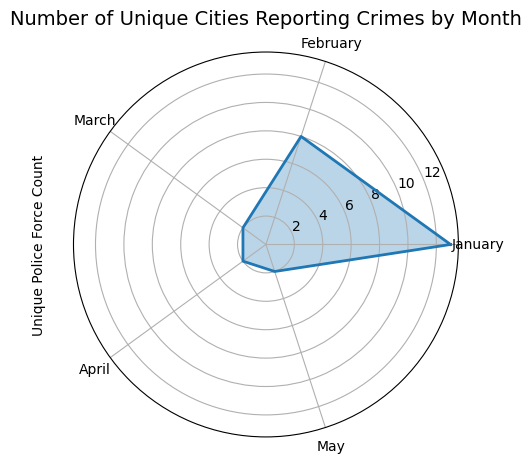

In [208]:
# นับจำนวน "เมืองที่เกิดอาชญากรรม" ในแต่ละเดือน (unique)
import numpy as np
import matplotlib.pyplot as plt
city_month_counts = (
    merged_df.groupby('Month Name')['Police Force']
    .nunique()
    .reset_index(name='Unique Cities')
)

# เรียงเดือนให้ถูกลำดับ
month_order = [
    'January', 'February', 'March', 'April', 'May']
city_month_counts['Month Name'] = pd.Categorical(city_month_counts['Month Name'], categories=month_order, ordered=True)
city_month_counts = city_month_counts.sort_values('Month Name')

# เตรียมข้อมูลสำหรับ Radar Chart
categories = city_month_counts['Month Name'].tolist()
values = city_month_counts['Unique Cities'].tolist()

# ปิดวงให้สมบูรณ์
values += values[:1]
angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
angles += angles[:1]

# วาด Radar Chart
plt.figure(figsize=(5, 5))
ax = plt.subplot(111, polar=True)

ax.plot(angles, values, linewidth=2, color='tab:blue')
ax.fill(angles, values, color='tab:blue', alpha=0.3)

# ตั้งค่าป้าย
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, fontsize=10)
ax.set_title('Number of Unique Cities Reporting Crimes by Month', size=14, pad=20)
ax.set_ylabel('Unique Police Force Count', labelpad=20)

plt.tight_layout()
plt.show()

<Figure size 1600x800 with 0 Axes>

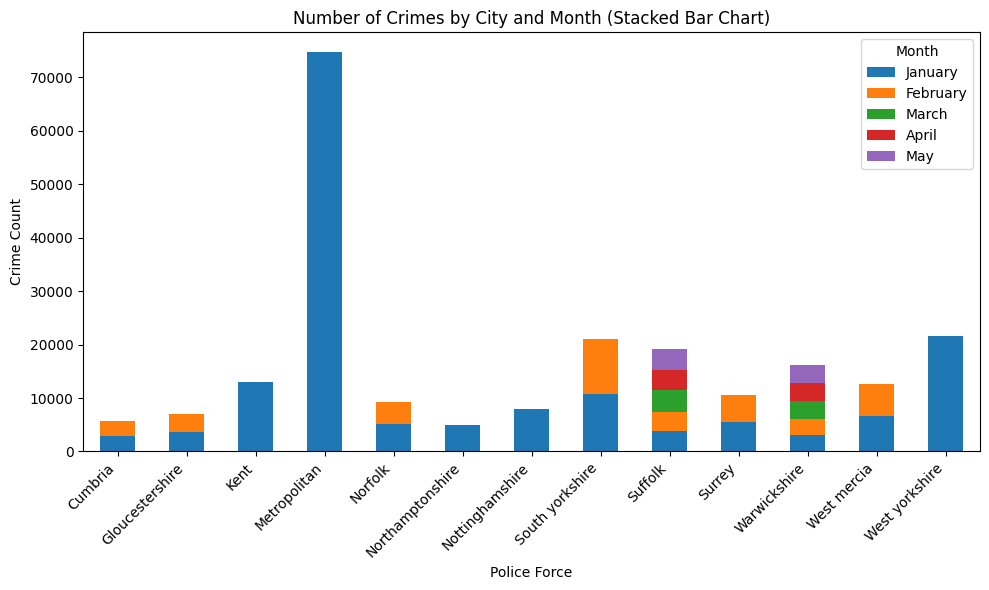

In [209]:
# Regenerate city_month_counts to ensure it's correct
# Group by Month, City, and Month Name and count the occurrences
city_month_counts = merged_df.groupby(['Month', 'Police Force', 'Month Name']).size().reset_index(name='Crime Count')


# Pivot ข้อมูล
pivot_city_month = city_month_counts.pivot(
    index='Police Force',
    columns='Month Name',
    values='Crime Count'
).fillna(0)

# กำหนดลำดับเดือนที่ถูกต้อง
month_order = [
    'January', 'February', 'March', 'April', 'May']

# จัดเรียงคอลัมน์ตาม month_order (ถ้ามีบางเดือนหาย จะข้ามอัตโนมัติ)
pivot_city_month = pivot_city_month.reindex(columns=[m for m in month_order if m in pivot_city_month.columns])


# สร้างกราฟ stacked bar
plt.figure(figsize=(16, 8))
pivot_city_month.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title('Number of Crimes by City and Month (Stacked Bar Chart)')
plt.xlabel('Police Force')
plt.ylabel('Crime Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Month', loc='upper right')
plt.tight_layout()
plt.show()

## Crime type and Outcome type

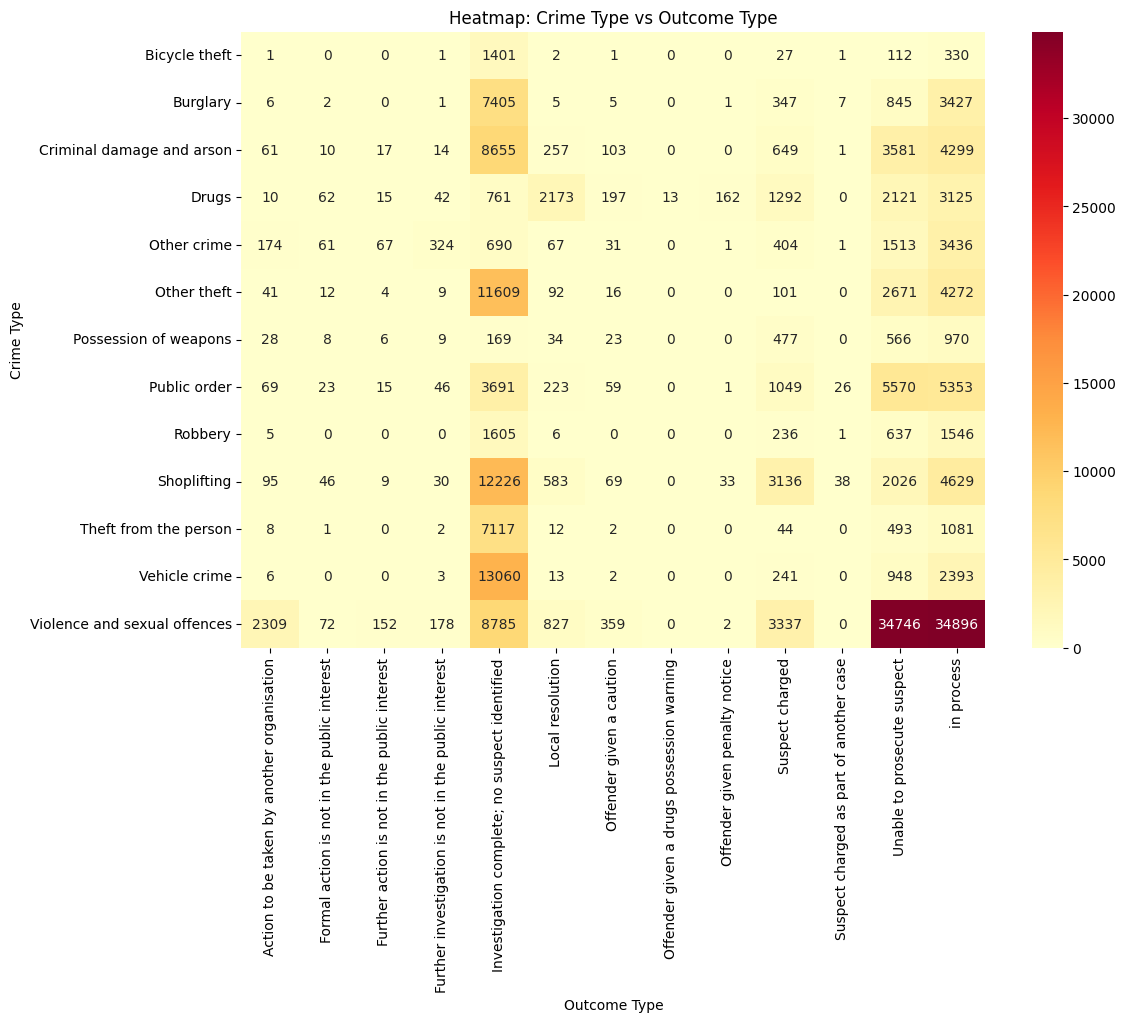

In [210]:
Crime_Outcome = pd.crosstab(merged_df['Crime type'], merged_df['Outcome type'])

plt.figure(figsize=(12,8))
sns.heatmap(Crime_Outcome, annot=True, fmt='d', cmap='YlOrRd')
plt.title('Heatmap: Crime Type vs Outcome Type')
plt.xlabel('Outcome Type')
plt.ylabel('Crime Type')
plt.show()

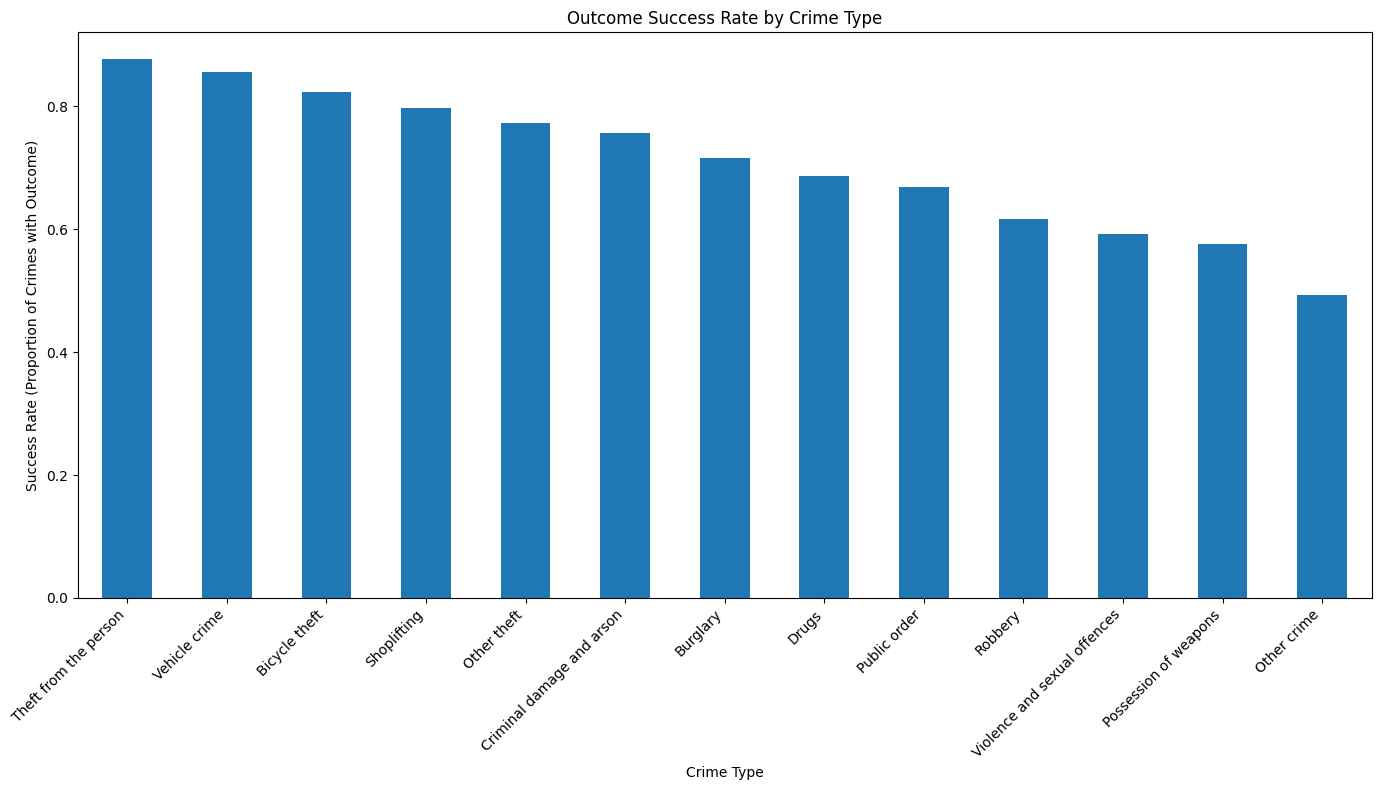

In [211]:
# Calculate the outcome success rate for each crime type
crime_outcome_success_rate = merged_df.groupby('Crime type')['Have Outcome'].mean().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(14, 8))
crime_outcome_success_rate.plot(kind='bar')
plt.title('Outcome Success Rate by Crime Type')
plt.xlabel('Crime Type')
plt.ylabel('Success Rate (Proportion of Crimes with Outcome)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

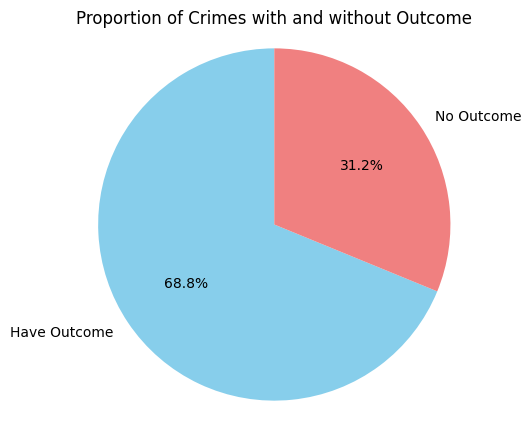

In [212]:
# Calculate total crimes with and without outcome
outcome_counts = merged_df['Have Outcome'].value_counts()
label_map = {0: 'No Outcome', 1: 'Have Outcome'}

# Plotting
plt.figure(figsize=(5, 5))
plt.pie(outcome_counts, labels=[label_map[x] for x in outcome_counts.index], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Proportion of Crimes with and without Outcome')
plt.axis('equal')
plt.show()

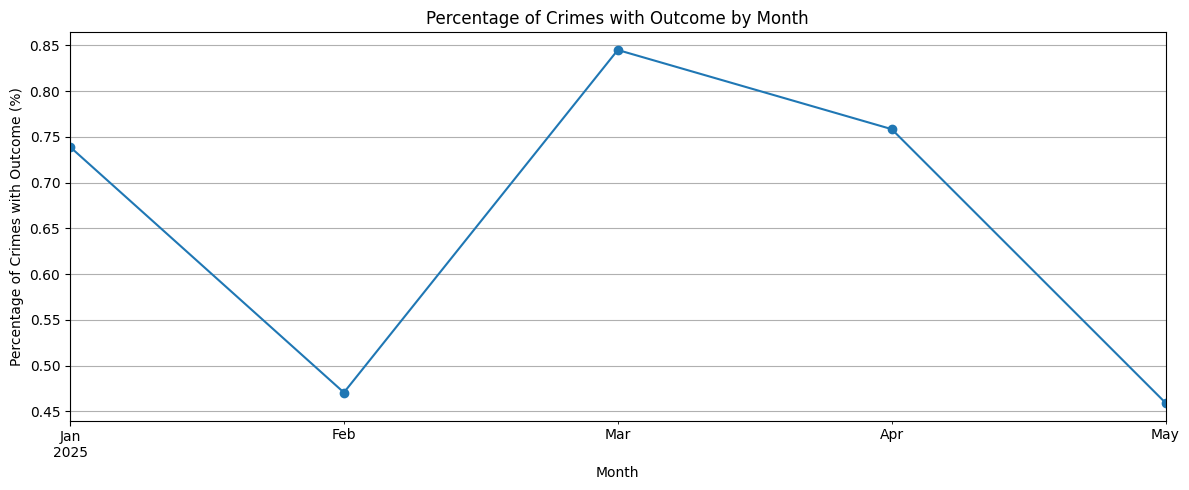

In [213]:
# Group by Month and calculate the mean of 'Have Outcome'
outcome_by_month = merged_df.groupby('Month')['Have Outcome'].mean()

# Plotting the line graph
plt.figure(figsize=(12, 5))
outcome_by_month.plot(kind='line', marker='o')
plt.title('Percentage of Crimes with Outcome by Month')
plt.xlabel('Month')
plt.ylabel('Percentage of Crimes with Outcome (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

## Location ที่เกิดเหตุบ่อย

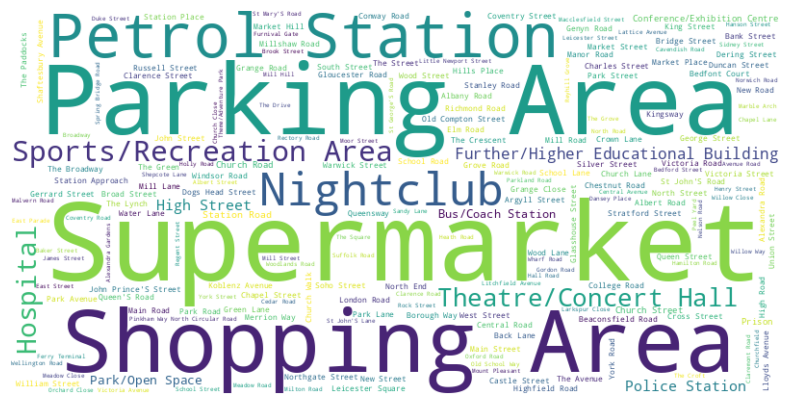

In [214]:
# Calculate the count of each Location in the Warwickshire DataFrame
from wordcloud import WordCloud
import matplotlib.pyplot as plt

Location_counts = merged_df['Location'].value_counts()

# Create a dictionary from the counts
Location_dict = Location_counts.to_dict()

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(Location_dict)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

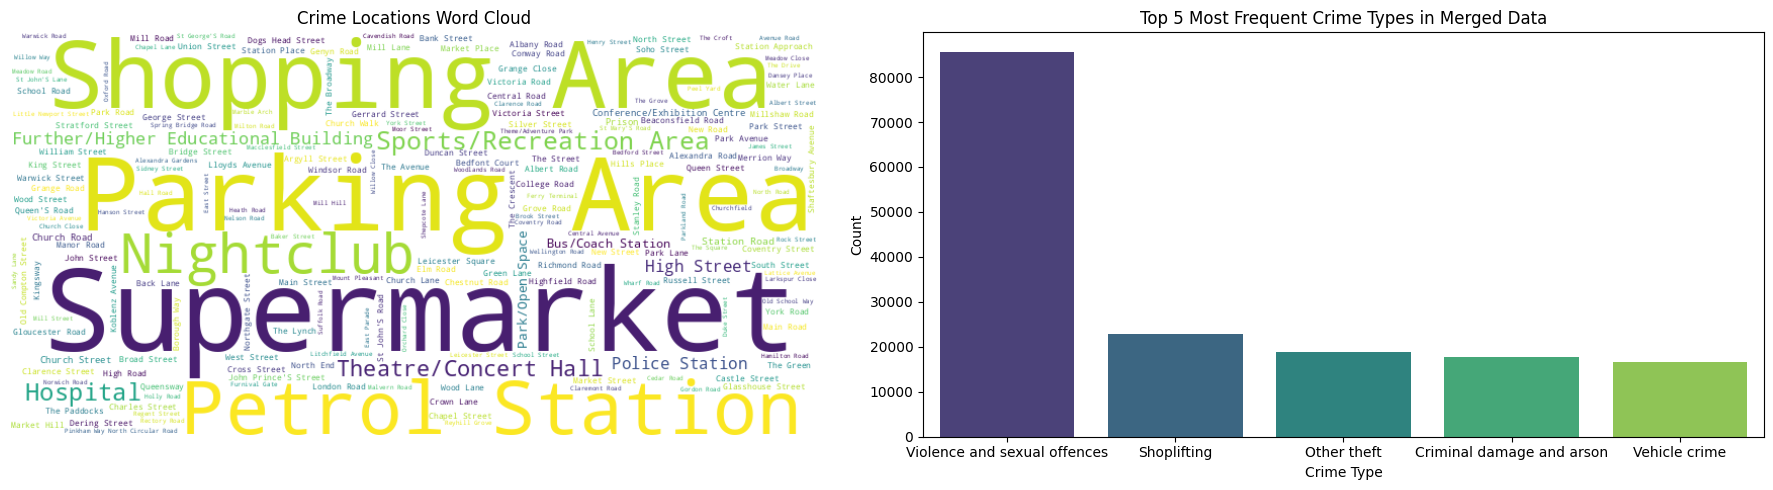

In [215]:
# ข้อมูลสำหรับ Word Cloud
Location_counts = merged_df['Location'].value_counts()
Location_dict = Location_counts.to_dict()
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(Location_dict)

# ข้อมูลสำหรับ Bar Chart
top_5_crime_types = merged_df['Crime type'].value_counts().head()

# สร้าง Subplots
# สร้าง Figure ที่มี 1 แถว, 2 คอลัมน์ เพื่อวางกราฟข้างกัน
fig, axes = plt.subplots(1, 2, figsize=(18, 5))

# วาดกราฟแรกลงช่อง axes[0]
axes[0].imshow(wordcloud, interpolation='bilinear')
axes[0].axis('off')
axes[0].set_title('Crime Locations Word Cloud')

# วาดกราฟสองลงช่อง axes[1]
sns.barplot(
    x=top_5_crime_types.index,
    y=top_5_crime_types.values,
    palette='viridis',
    ax=axes[1]
)
axes[1].set_title('Top 5 Most Frequent Crime Types in Merged Data')
axes[1].set_xlabel('Crime Type')
axes[1].set_ylabel('Count')

# แสดงผล
plt.tight_layout()
plt.show()

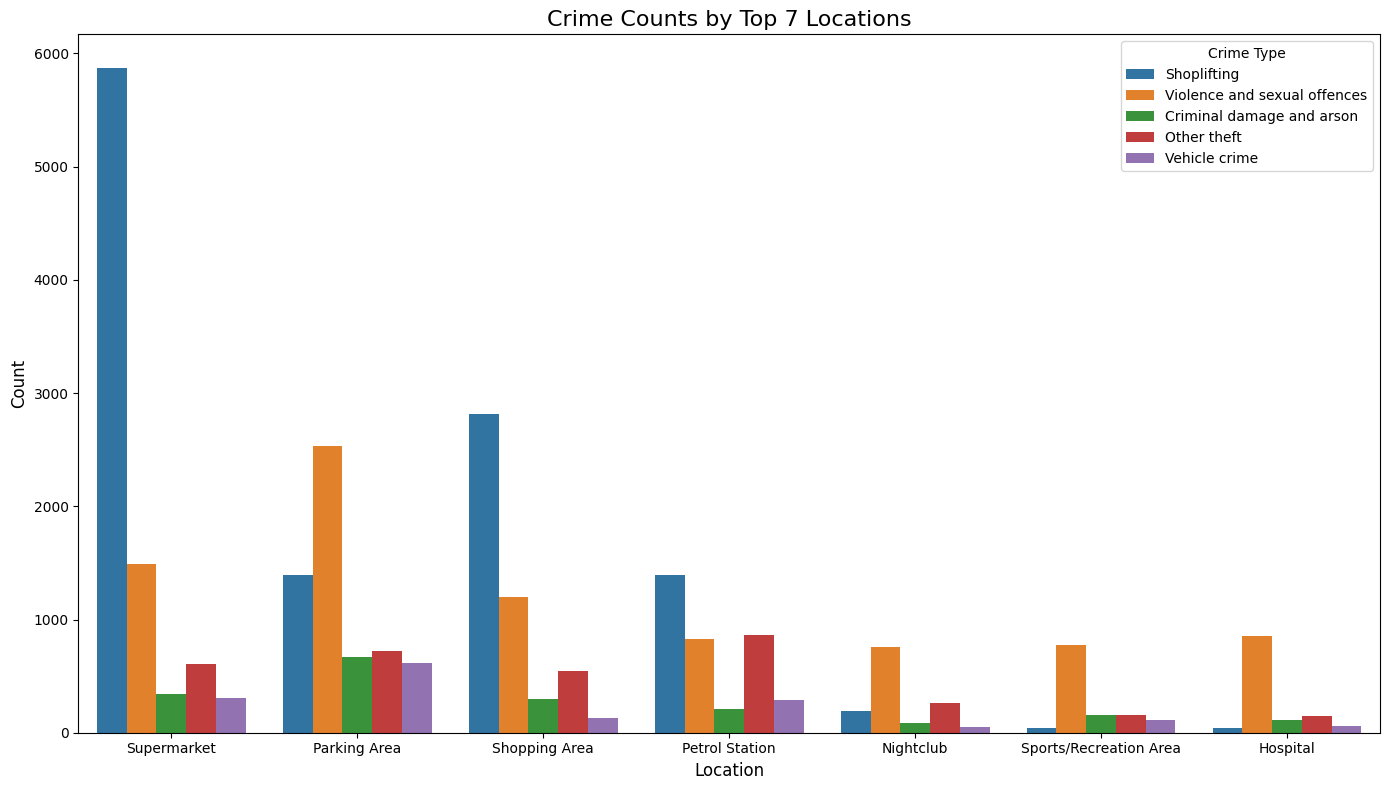

In [216]:
# กรองข้อมูลให้เหลือเฉพาะ Top 7 Locations และ Top 5 Crimes
top_7_locations = merged_df['Location'].value_counts().head(7).index
top_5_crimes = merged_df['Crime type'].value_counts().head(5).index

filtered_df = merged_df[
    (merged_df['Location'].isin(top_7_locations)) &
    (merged_df['Crime type'].isin(top_5_crimes))
]

# สร้างกราฟ
plt.figure(figsize=(14, 8))
sns.countplot(
    data=filtered_df,
    x='Location',
    hue='Crime type',
    order=top_7_locations
)

plt.title('Crime Counts by Top 7 Locations', fontsize=16)
plt.xlabel('Location', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Crime Type', loc='upper right')
plt.tight_layout()
plt.show()

กราฟนี้แสดงจำนวนอาชญากรรม 5 ประเภทหลัก ได้แก่
Violence and sexual offences, Other theft, Shoplifting, Criminal damage and arson, และ Vehicle crime
ที่เกิดขึ้นใน 7 พื้นที่ยอดนิยม ได้แก่
Supermarket, Parking Area, Shopping Area, Petrol Station, Nightclub, Sports/Recreation Area, และ Hospital
* ประเภทอาชญากรรมที่เกิดบ่อยที่สุดคือ Shoplifting
โดยเฉพาะในพื้นที่ที่มีสินค้าจำนวนมากและเข้าถึงง่าย (Supermarket, Shopping Area)

* อาชญากรรมด้านความรุนแรงพบมากในพื้นที่สาธารณะและมีการดื่มแอลกอฮอล์ (Nightclub, Parking Area)

การคาดการณ์สาเหตุส่วนใหญ่สัมพันธ์กับ สภาพแวดล้อมทางกายภาพ, พฤติกรรมของผู้คน, และ แรงจูงใจทางเศรษฐกิจ

| ประเภทอาชญากรรม                  | สถานที่ที่มีแนวโน้มเกิดบ่อย                    | การคาดการณ์สาเหตุของอาชญากรรม                                                                                                                                                                    |
| -------------------------------- | -------------------------------------------------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ |
| **Violence and sexual offences** | *Nightclub*, *Pub*, *Hospital*, *Street*, *Park*               | อาจเกิดจากบรรยากาศของสถานที่ที่มีการดื่มแอลกอฮอล์หรือรวมตัวของคนจำนวนมาก เช่น ผับหรือไนต์คลับ  <br> ซึ่งเพิ่มความเสี่ยงต่อความขัดแย้ง การทะเลาะวิวาท หรือการล่วงละเมิดทางเพศ โดยเฉพาะในช่วงเวลากลางคืน |
| **Shoplifting**                  | *Supermarket*, *Shopping Area*, *Retail Park*                  | มีแรงจูงใจจากโอกาสเข้าถึงสินค้าได้ง่าย และพื้นที่มีผู้คนพลุกพล่าน ทำให้ผู้ก่อเหตุสามารถหลบหนีหรือ  <br> แฝงตัวได้ง่าย รวมถึงอาจเกิดจากปัญหาเศรษฐกิจหรือพฤติกรรมเสพติดการขโมย (kleptomania)              |
| **Other theft**                  | *Parking Area*, *Petrol Station*, *Bus Station*, *High Street* | สาเหตุอาจมาจากการที่ผู้คนละเลยทรัพย์สินชั่วคราว เช่น วางกระเป๋าหรือโทรศัพท์ไว้ในที่สาธารณะ หรือ  <br> ขณะเติมน้ำมัน โดยเป็นพื้นที่ที่ผู้คนเดินทางผ่านและมีโอกาสเข้าถึงสิ่งของผู้อื่นได้โดยง่าย          |
| **Criminal damage and arson**    | *Car Park*, *Residential Area*, *Street*                       | อาจเกิดจากความคับแค้นใจ ความมึนเมา หรือความต้องการระบายอารมณ์ของผู้กระทำ รวมถึงการก่อกวน  <br>  ในยามวิกาล หรือความขัดแย้งภายในชุมชน                                                                     |
| **Vehicle crime**                | *Parking Area*, *Supermarket*, *Petrol Station*                | มักเกิดจากโอกาสเข้าถึงยานพาหนะที่จอดไว้นานโดยไม่มีการเฝ้าระวัง เช่น การทุบกระจกขโมยของในรถ <br>  หรือการโจรกรรมรถยนต์ในลานจอดรถของห้างและปั๊มน้ำมัน                                                    |


#Looker

[Link Looker ](https://lookerstudio.google.com/reporting/22fa40d6-435f-45d1-9476-f9d296beae9d)